<big><big>**Лабораторный практикум 9. Линейные пространства и операторы. Процесс ортогонализации Грамма-Шмидта.**<big><big>

Загрузка необходимых библиотек:

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from sympy import *

<big>**Упражнение 9.1. Найти ранг и какой-нибудь базис системы геометрических векторов $x_1=-i+2j$, $x_2=2i-j+k$, $x_3=-4i+5j-k$, $x_4=3i-3j+k$. Разложить вектор $a=4i+j+3k$ по этому базису (используйте обратную матрицу). Сделать проверку.**<big>

In [13]:
A = Matrix([[-1, 2, 0], [2, -1, 1], [-4, 5, -1], [3, -3, 1]])
print("Ранг матрицы:", A.rank())
print("Базис системы векторов (x₁,  x₂):", *A.T.columnspace())

Ранг матрицы: 2
Базис системы векторов (x₁,  x₂): Matrix([[-1], [2], [0]]) Matrix([[2], [-1], [1]])


In [14]:
A = np.matrix ([[-1, 2], [2, -1]])
B = np.matrix ([[4], [1]])

A_inv = np.linalg.inv(A)
X = A_inv.dot(B)
print(X)

[[2.]
 [3.]]


*Проверка.*

In [15]:
X = np.matrix ('2; 3')
print(np.dot(A, X)-B)

[[0]
 [0]]


<big>*Ответ: $a = 2x₁ + 3x₂$*<big>

<big>**Упражнение 9.2. В пространстве $R4$ заданы векторы $e_1^{'}=(1,1,1,1)$, $e_2^{'}=(1,1,-1,-1)$, $e_3^{'}=(1,-1,1,-1)$, $e_4^{'}=(1,-1,-1,1)$. Доказать, что $B1=(e_1^{'}, e_2^{'}, e_3^{'}, e_4^{'} )$ - базис в $R4$. Написать матрицу перехода $T_(B→B1)$, где $В$ – канонический базис в $R4$. Найти в базисе $B1$ координаты вектора $X=(1,2,1,1)$. Сделать проверку.**<big>

In [16]:
e1_B1 = np.array([1, 1, 1, 1])
e2_B1 = np.array([1, 1, -1, -1])
e3_B1 = np.array([1, -1, 1, -1])
e4_B1 = np.array([1, -1, -1, 1])

A = np.matrix([e1_B1, e2_B1, e3_B1, e4_B1])
print(np.linalg.det(A)!=0)

True


*Определитель матрицы не равен нулю, следовательно, вектора являются базисными.*

In [17]:
x = np.matrix("1; 2; 1; 1")
A = A.transpose()
A_inv = np.linalg.inv(A)
print(A_inv.dot(x))

[[ 1.25]
 [ 0.25]
 [-0.25]
 [-0.25]]


*Проверка:*

In [18]:
Q = np.matrix("1.25; 0.25; -0.25; -0.25")
print(np.dot(A, Q) - x)

[[0.]
 [0.]
 [0.]
 [0.]]


<big>*Ответ: $x = 1.25e_1^{'} + 0.25e_2^{'} - 0.25e_3^{'} - -0.25e_4^{'}$.*<big>

<big>**Упражнение 9.3. Выполнить задание из примера 1 с помощью метода rref.**<big>

In [19]:
A = Matrix([[-1, 2, 0], [2, -1, 1], [-4, 5, -1], [3, -3, 1]])

print("Преобразованная матрица, в левой части которой стоит единичная матрица:\n")
pprint(A.rref()[0])

print("\nИндексы базисных столбцов входной матрицы:")
print(A.rref()[1])

print("\nРанг матрицы:", len(A.rref()[1]))

Преобразованная матрица, в левой части которой стоит единичная матрица:

⎡1  0  2/3⎤
⎢         ⎥
⎢0  1  1/3⎥
⎢         ⎥
⎢0  0   0 ⎥
⎢         ⎥
⎣0  0   0 ⎦

Индексы базисных столбцов входной матрицы:
(0, 1)

Ранг матрицы: 2


<big>**Упражнение 9.4. Применить процесс ортогонализации Грамма-Шмидта к указанным системам векторов. Проверить ортогональность полученной системы. Изобразить старую и новую системы векторов. Разложить произвольный вектор в старом и новом базисах.**<big>

<big><big>**1) $f₁ = (1, 1), f₂ = (0, 1)$**<big><big>

In [20]:
e1 = [1, 1]
e2 = [0, 1]

F = [Matrix(e1), Matrix(e2)]
print(*GramSchmidt(F))

Matrix([[1], [1]]) Matrix([[-1/2], [1/2]])


In [21]:
e1_n = [1, 1]
e2_n = [-1/2, 1/2]

print(np.dot(e1_n, e2_n) == 0)

True


*Cкалярное произведение векторов равно нулю, следовательно, вектора ортогональны.*

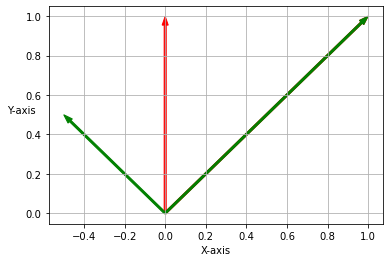

In [22]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis", rotation=0)

plt.arrow(0, 0, e1[0], e1[1], width=0.01, color='r', length_includes_head=True)
plt.arrow(0, 0, e2[0], e2[1], width=0.01, color='r', length_includes_head=True)

plt.arrow(0, 0, e1_n[0], e1_n[1], width=0.01, color='g', length_includes_head=True)
plt.arrow(0, 0, e2_n[0], e2_n[1], width=0.01, color='g', length_includes_head=True)

plt.grid()
plt.show()

*Разложение вектора $b = (4, 7)$ в старом базисе:*

In [23]:
A = np.matrix([e1, e2])
print(np.linalg.det(A)!=0)

True


*Определитель матрицы не равен нулю, следовательно, вектора являются базисными.*

In [24]:
B = np.matrix ('4; 7')
A = A.transpose()
A_inv = np.linalg.inv(A)
print(A_inv.dot(B))

[[4.]
 [3.]]


<big>*Ответ: $b = 4e₁ + 3e₂$*<big>

*Разложение вектора $b = (4, 7)$ в новом базисе:*

In [25]:
A = np.matrix([e1_n, e2_n])
print(np.linalg.det(A)!=0)

True


*Определитель матрицы не равен нулю, следовательно, вектора являются базисными.*

In [26]:
B = np.matrix ('4; 7')
A = A.transpose()
A_inv = np.linalg.inv(A)
print(A_inv.dot(B))

[[5.5]
 [3. ]]


<big>*Ответ: $b = 5.5e₁ + 3e₂$*<big>

<big>**2) $f₁ = (1, 1, 1), f₂ = (2, 1, 2), f₃ = (-3, 0, 2)$**<big>

In [27]:
e1 = [1, 1, 1]
e2 = [2, 1, 2]
e3 = [-3, 0, 2]

F = [Matrix(e1), Matrix(e2), Matrix(e3)]
print(*GramSchmidt(F))

Matrix([[1], [1], [1]]) Matrix([[1/3], [-2/3], [1/3]]) Matrix([[-5/2], [0], [5/2]])


In [28]:
e1_n = [1, 1, 1]
e2_n = [1/3, -2/3, 1/3]
e3_n = [-5/2, 0, 5/2]

print(np.dot(e1_n, e2_n) == 0)
print(np.dot(e1_n, e3_n) == 0)
print(np.dot(e2_n, e3_n) == 0)

True
True
True


*Cкалярные произведения векторов равны нулю, следовательно, вектора ортогональны.*

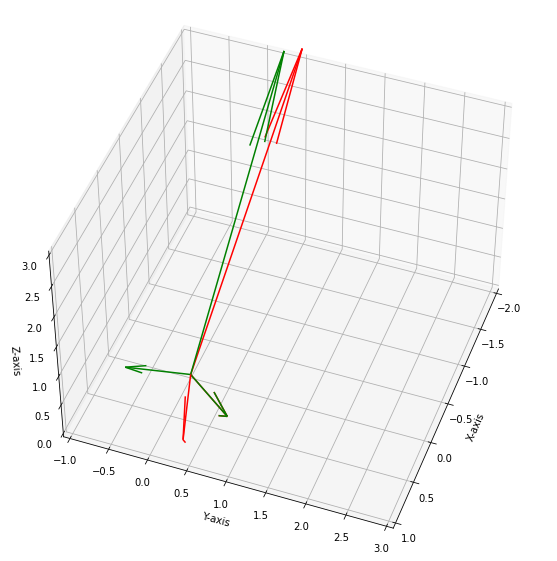

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.set_xlabel("X-axis")
ax.set_xlim(-2, 1)
ax.set_ylabel("Y-axis")
ax.set_ylim(-1, 3)
ax.set_zlabel("Z-axis")
ax.set_zlim(0, 3)
ax.view_init(45, 20)

ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color="red")
ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color="red")
ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color="red")

ax.quiver(0, 0, 0, e1_n[0], e1_n[1], e1_n[2], color="green")
ax.quiver(0, 0, 0, e2_n[0], e2_n[1], e2_n[2], color="green")
ax.quiver(0, 0, 0, e3_n[0], e3_n[1], e3_n[2], color="green")

plt.show()

*Разложение вектора $b = (4, 7, -3)$ в старом базисе:*

In [100]:
A = np.matrix([e1, e2, e3])
print(np.linalg.det(A)!=0)

True


*Определитель матрицы не равен нулю, следовательно, вектора являются базисными.*

In [101]:
B = np.matrix ('4; 7; -3')
A = A.transpose()
A_inv = np.linalg.inv(A)
print(A_inv.dot(B))

[[14.2]
 [-7.2]
 [-1.4]]


<big>*Ответ: $b = 14.2e₁ - 7.2e₂ - 1.4e₃$*<big>

*Разложение вектора $b = (4, 7, -3)$ в новом базисе:*

In [104]:
A = np.matrix([e1_n, e2_n, e3_n])
print(np.linalg.det(A)!=0)

True


*Определитель матрицы не равен нулю, следовательно, вектора являются базисными.*

In [105]:
B = np.matrix ('4; 7; -3')
A = A.transpose()
A_inv = np.linalg.inv(A)
print(A_inv.dot(B))

[[ 2.66666667]
 [-6.5       ]
 [-1.4       ]]


<big>*Ответ: $b = 2.6e₁ - 6.5e₂ - 1.4e₃$*<big>

<big>**Упражнение 9.5. Матрица линейного оператора в некотором базисе $B = (e₁, e₂)$ равна $A = \begin{pmatrix}
8 & 4 \\
5 & 2
\end{pmatrix}$. Найти матрицу этого оператора в базисе $f₁ = 2e₁+e₂$, $f₂ = 6e₁+4e₂$.**<big>

In [123]:
A = Matrix([[8, 4], [5, 2]])
F = np.matrix('2 1 ; 6 4 ')
F_inv = np.linalg.inv(F)

pprint(F_inv*A*F)

⎡69.0   41.5 ⎤
⎢            ⎥
⎣-98.0  -59.0⎦


<big>**Упражнение 9.6. Матрица линейного оператора в некотором базисе $B = (e₁, e₂, e₃, e₄)$ равна $A = \begin{pmatrix}
1 & 2 & 0 & 1 \\
3 & 0 & -1 & 2 \\
2 & 5 & 3 & 1 \\
1 & 2 & 1 & 3 
\end{pmatrix}$. Найти матрицу этого оператора в базисе $B₁ = (e₁, e₁ + e₂, e₁ + e₂ + e₃, e₁ + e₂ + e₃ + e₄)$.**<big>

In [124]:
A = Matrix([[1, 2, 0, 1], [3, 0, -1, 2], [2, 5, 3, 1], [1, 2, 1, 3]])
F = np.matrix('1 0 0 0; 1 1 0 0; 1 1 1 0; 1 1 1 1')
F_inv = np.linalg.inv(F)

pprint(F_inv*A*F)

⎡4.0   3.0   1.0  1.0 ⎤
⎢                     ⎥
⎢ 0    -2.0   0   1.0 ⎥
⎢                     ⎥
⎢7.0   8.0   3.0  -1.0⎥
⎢                     ⎥
⎣-4.0  -3.0   0   2.0 ⎦


<big>**Упражнение 9.7. Линейный оператор в базисе $(a₁, a₂, a₃)$ задан матрицей $A = \begin{pmatrix}
-1 & 1 & 2 \\
1 & 1 & -2 \\
1 & 1 & 4 
\end{pmatrix}$. Найти матрицу этого оператора в базисе $(b₁, b₂, b₃)$. (координаты векторов даны в некотором базисе $(e₁, e₂, e₃)$). $a₁=(1, -2, 1)$, $a₂=(-1, 2, 1)$, $a₃=(-1, 3, 1)$, $b₁=(1, 0, 2)$, $b₂=(3, 0, -2)$, $b₃=(3, -1, -1)$**<big>

In [145]:
A = Matrix([[-1, 1, 2], [1, 1, -2], [1, 1, 4]])
B = np.matrix('1, -2, 1; -1, 2, 1; -1, 3, 1')
BB = np.matrix('1, 0, 2; 3, 0, -2; 3, -1, -1')
B_inv = np.linalg.inv(B)
NB = B_inv * BB
NB_inv = np.linalg.inv(NB)

pprint(NB_inv * NB * A)

⎡-1.0  1.0  2.0 ⎤
⎢               ⎥
⎢1.0   1.0  -2.0⎥
⎢               ⎥
⎣1.0   1.0  4.0 ⎦
